In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn import linear_model

Данные о различных штатах США с информацией о проценте людей, живущих в столичной области, проценте белокожиго населения, проценте людей с высшим образованием, процентом людей, проживающих в бедности и проценте семей, где женщина является домохозяйкой

In [44]:
url ='http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv'
df = pd.read_csv(url)
df.head(8)

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1


Рассмотрим, как уровень бености зависит от высшего образования

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           3.11e-10
Time:                        14:18:47   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      9.523      0.0

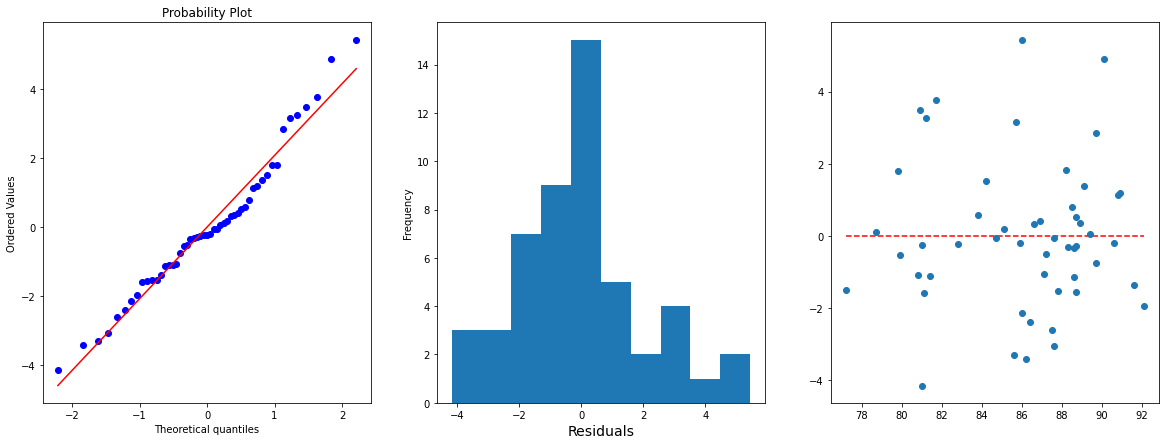

In [51]:
m1 = sm.ols('poverty ~ hs_grad', data=df)
fitted = m1.fit()
#Fit summary
print(fitted.summary())

plt.figure(figsize=(20,7))
#QQplot
plt.subplot(131)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
#Гистограмма остатков
plt.subplot(132)
(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
#Изменчивость остатков
plt.subplot(133)
plt.plot(df['hs_grad'], fitted.resid, 'o')
plt.hlines(np.mean(fitted.resid), df['hs_grad'].min(), df['hs_grad'].max(), linestyle='--', colors='red')
plt.show()

Видно, что остатки распределены нормально, изменчивость является постоянной (выполняется гипотеза гомоскедостичности), а значит, оправданно пременить регрессионный анализ

In [40]:
#коэффициенты регрессии
lr = linear_model.LinearRegression()
X = df['hs_grad']
y = df['poverty']
lr.fit(np.array(X).reshape(-1, 1), y)
print('slope is ', round(lr.coef_[0], 2)) 
print('intercept is ', round(lr.intercept_, 2))
print('R^2 is',lr.score(np.array(X).reshape(-1, 1), y))

slope is  -0.62
intercept is  64.78
R^2 is 0.5577972503105937


Визуализация:

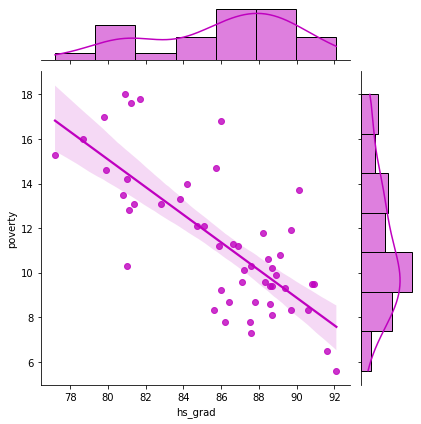

In [14]:
sns.jointplot(x='hs_grad', y='poverty', data=df, kind='reg', color='m')

Видно, что с увеличением процента образования, процент бедности падает на 0,62%, при этом если бы все были без образования, то уровень бедности составил бы 64,78%

56% изменчивости уровня бедности объяснено наличием высшего образования

3D визуализация регрессии, рассматривая также процент белокожего населения

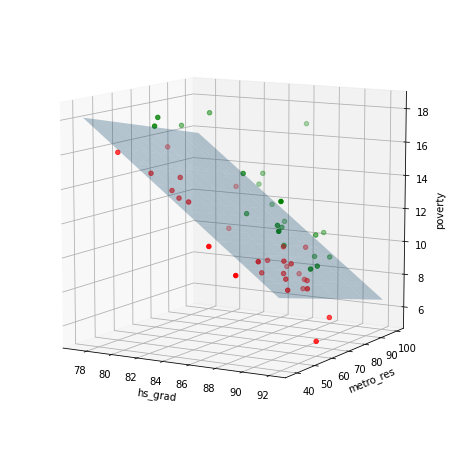

In [65]:
data = df
lm = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()

lm.params

def f(x, y):
    return lm.params.Intercept + lm.params.hs_grad * x  + lm.params.metro_res * y

x = data.hs_grad.sort_values()
y = data.metro_res.sort_values()

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
data_below_serf = data[data['poverty'] < f(data['hs_grad'], data['metro_res'])]
data_above_serf = data[data['poverty'] >= f(data['hs_grad'], data['metro_res'])]
ax.scatter(data_below_serf.hs_grad, data_below_serf.metro_res, data_below_serf.poverty, c='r', marker='o')
ax.scatter(data_above_serf.hs_grad, data_above_serf.metro_res, data_above_serf.poverty, c='g', marker='o')
ax.set_xlabel('hs_grad')
ax.set_ylabel('metro_res')
ax.set_zlabel('poverty')

ax.elev = 10
ax.azim = -60

Множественная регрессия

In [66]:
m1 = sm.ols('poverty ~ hs_grad + metro_res + white + female_house', data=df)
fitted = m1.fit()
#Fit summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           8.88e-10
Time:                        17:35:48   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280   

Получаем, что больше всего на уровень бедности влияет наличие высшего образования, а цвет кожи значимо не влияет на таргет. При этом 61% изменчивости данных объясняется данной регрессионной моделью 

Теперь посмотрим корреляции между параметрами, чтобы избавиться от мультиколлинеарности

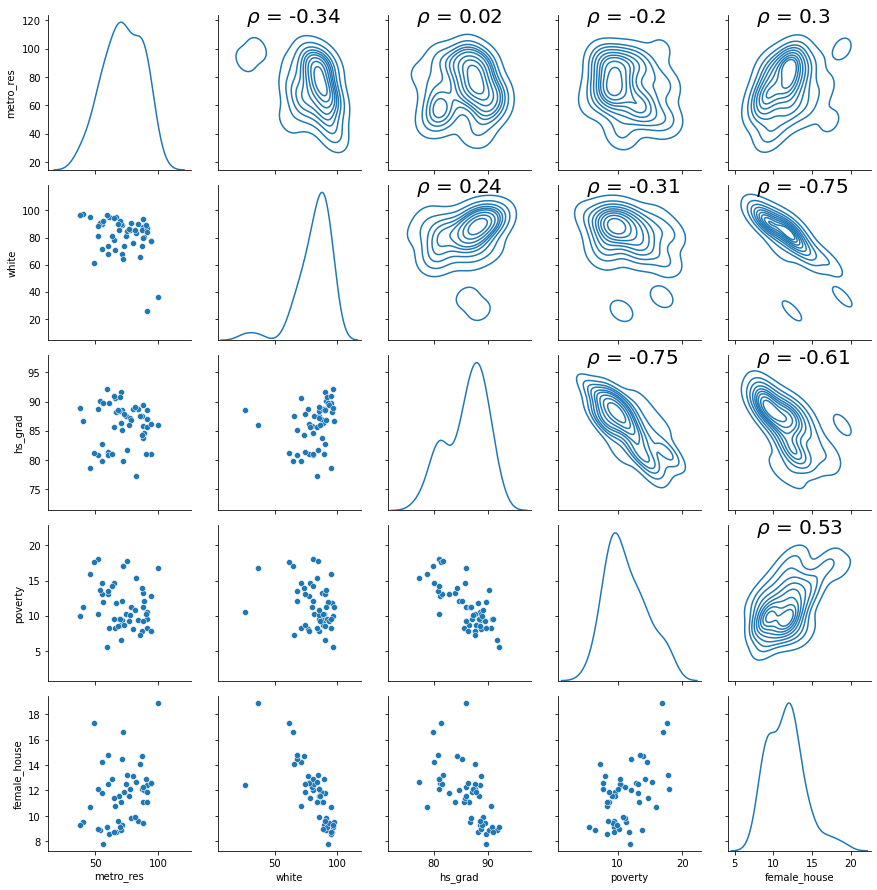

In [116]:
def corr(x, y, **kwargs):
    # Коэффициент корреляции
    coef = np.corrcoef(x, y)[0][1] #т.к. получаем матрицу корреляции
    # Легенда
    label = r'$\rho$ = ' + str(round(coef, 2))
    # получаем текущие оси
    ax = plt.gca() 
    # Добавляем ее на график
    ax.annotate(label, xy = (0.2, .95), size = 20, xycoords = ax.transAxes)

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.kdeplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

Видно, что большая корреляция достигается между hs_grad и female_house. Поскольку hs_grad коррелирует с таргетом сильнее, чем female_house, то избавимся от последнего

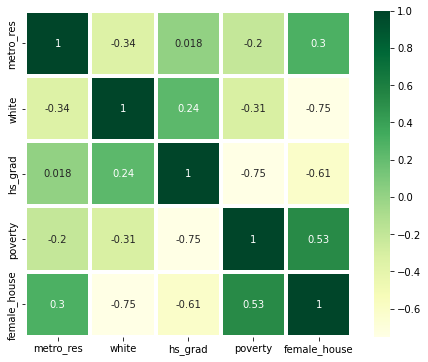

In [107]:
features = data.columns
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data[features].corr(), annot=True, square=True, cmap="YlGn", linewidths=3)
plt.show()

In [117]:
m1 = sm.ols('poverty ~ hs_grad + metro_res + white', data=df)
fitted = m1.fit()
#Fit summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.55e-10
Time:                        20:46:07   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.0

Видно, что коэффициент детерминации вырос после исключения из регрессионой модели переменной female_house